In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
housing = pd.read_csv('Melbourne_housing.csv')
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
#Selecting the columns I want to work with.
housing = housing[['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
                   'Lattitude', 'Longtitude', 'Propertycount', 'Regionname']]
housing.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Regionname
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0,Northern Metropolitan
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0,Northern Metropolitan
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,Northern Metropolitan
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0,Northern Metropolitan
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,Northern Metropolitan


In [4]:
print(housing.shape)

(34857, 14)


In [5]:
price = housing['Price']
features = housing.drop('Price', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42)

X_train.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27885.000000,27884.000000,27884.000000,21330.000000,21324.000000,20915.00000,18463.000000,11040.000000,12470.000000,21527.000000,21527.000000,27883.000000
mean,3.033387,11.185773,3116.277112,3.084576,1.624554,1.72852,604.674051,157.340452,1965.030473,-37.810621,145.001431,7573.251157
std,0.972545,6.808711,109.616593,0.968911,0.721508,1.01402,3746.068362,140.354878,37.702527,0.090417,0.120319,4423.180899
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1196.000000,-38.190430,144.431620,83.000000
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.00000,225.000000,102.000000,1940.000000,-37.862525,144.933100,4385.000000
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.00000,523.000000,136.000000,1970.000000,-37.807740,145.007200,6763.000000
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.00000,670.000000,188.000000,2000.000000,-37.754700,145.071900,10412.000000
max,16.000000,48.100000,3978.000000,20.000000,9.000000,26.00000,433014.000000,6791.000000,2106.000000,-37.390200,145.526350,21650.000000


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))


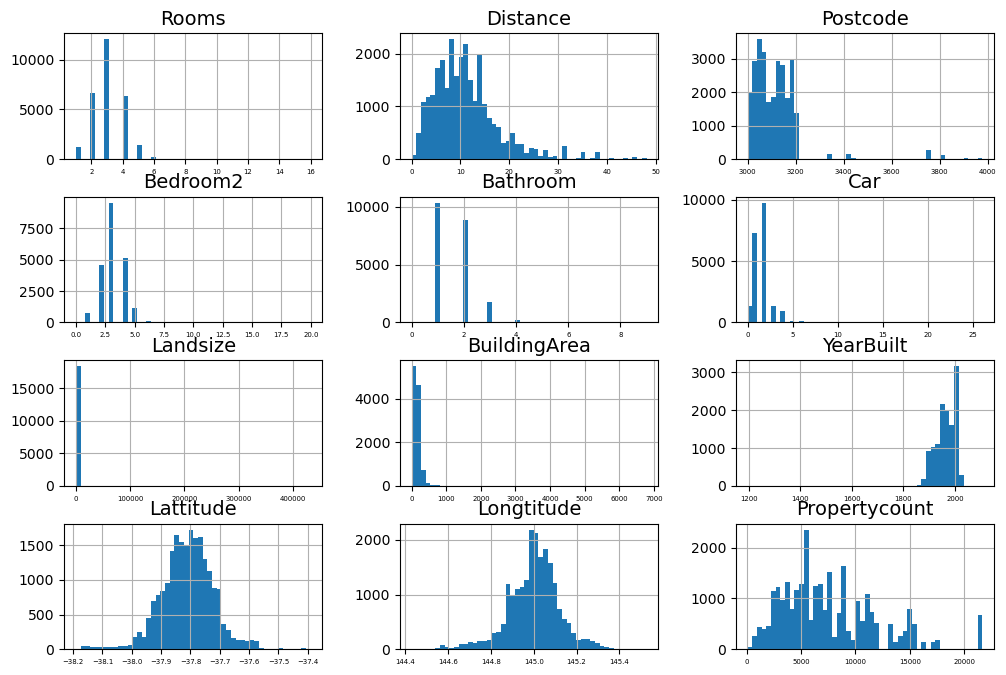

In [21]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=10)

# plots histograms of numerical data
X_train.hist(bins=50, figsize=(12, 8))
plt.show()

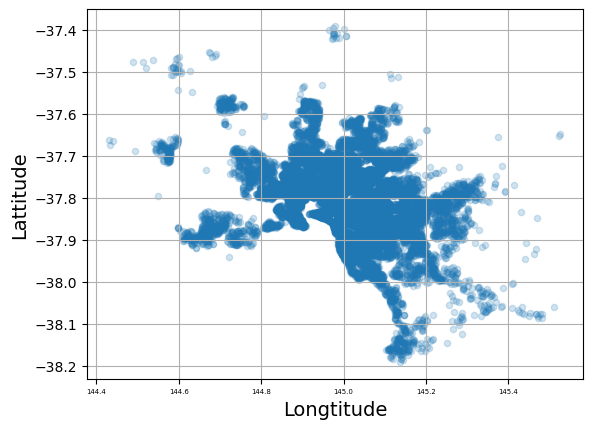

In [22]:
X_train.plot(kind="scatter", x="Longtitude", y="Lattitude", grid=True, alpha=0.2)
plt.show()

In [24]:
# Convert y_train back to a DataFrame or Series
y_train = pd.Series(y_train.ravel(), name="Price")

numerical_columns = ["Rooms", "Distance", "Bedroom2", 
                     "Bathroom", "Car", "Landsize", "BuildingArea", "Lattitude", "Longtitude"]
corr_matrix1 = pd.concat([X_train[numerical_columns], y_train], axis=1)

corr_matrix = corr_matrix1.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price           1.000000
Lattitude       0.010335
Longtitude      0.006671
Rooms           0.004413
Bathroom        0.004115
BuildingArea    0.001768
Distance        0.000793
Bedroom2       -0.000259
Landsize       -0.000578
Car            -0.007637
Name: Price, dtype: float64

In [25]:
# creates a Series of True/False values if there is a null value in a column
null_rows_idx = X_train.isnull().any(axis=1)

# selecting only the rows with null values
X_train.loc[null_rows_idx].head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Regionname
20967,4,13.8,3165.0,4.0,2.0,2.0,648.0,NaN,NaN,-37.90609,145.05510,10969.0,Southern Metropolitan
6672,2,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17496.0,Northern Metropolitan
17277,4,20.6,3064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5833.0,Northern Metropolitan
29528,3,7.3,3146.0,3.0,1.0,3.0,802.0,NaN,NaN,-37.85902,145.07505,10412.0,Southern Metropolitan
6108,3,7.5,3102.0,3.0,1.0,2.0,378.0,NaN,NaN,-37.79560,145.05250,2671.0,Southern Metropolitan


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="No Info"), OneHotEncoder(drop='first'))

In [27]:
from sklearn.compose import ColumnTransformer

numerical_attributes = X_train[["Rooms", "Distance", "Bedroom2", 
                     "Bathroom", "Car", "Landsize", "BuildingArea", "Lattitude", "Longtitude"]].columns.tolist()
categorical_attributes = X_train[['Regionname']].columns.tolist()

process = ColumnTransformer(transformers=[
        ("num", numerical_pipeline, numerical_attributes),
        ("cat", categorical_pipeline, categorical_attributes),
    ])

X_train_prepared = process.fit_transform(X_train)

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [29]:
from sklearn.model_selection import cross_val_score

lin_reg_rmses = -cross_val_score(lin_reg, X_train_prepared, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(lin_reg_rmses).describe()

count        10.000000
mean     468198.122816
std       32614.444162
min      425777.081040
25%      449234.459790
50%      465007.145602
75%      471222.617775
max      543516.265771
dtype: float64